In [1]:
import pandas as pd

In [2]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


## Data Collection

In [3]:
tsv_file_paths = ['Data/name.basics.tsv', 'Data/title.basics.tsv', 'Data/title.ratings.tsv']

In [4]:
dfs = []
for file_path in tsv_file_paths:
    df = pd.read_csv(file_path, sep='\t', low_memory=False)
    dfs.append(df)

In [5]:
df1 = dfs[0]
df2 = dfs[1]
df3 = dfs[2]

In [6]:
df4 = pd.read_json('Data/IMDB_reviews.json', lines=True)
df5 = pd.read_json('Data/IMDB_movie_details.json', lines=True)

In [7]:
#df1.head()

In [8]:
#df1 = df1.assign(knownForTitles=df1['knownForTitles'].str.split(',')).explode('knownForTitles')
#df1.head()

In [9]:
#df1.info()

In [10]:
#df1.replace('\\N', pd.NA, inplace=True)

In [11]:
#df1 = df1.dropna(subset=['knownForTitles'])

In [12]:
#df1.isnull().sum()

In [13]:
#df1 = df1.drop(columns=['nconst'])
#df1.head()

In [14]:
df2.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,5,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [15]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10790736 entries, 0 to 10790735
Data columns (total 9 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   tconst          object
 1   titleType       object
 2   primaryTitle    object
 3   originalTitle   object
 4   isAdult         object
 5   startYear       object
 6   endYear         object
 7   runtimeMinutes  object
 8   genres          object
dtypes: object(9)
memory usage: 740.9+ MB


In [16]:
df2['isAdult'] = df2['isAdult'].replace({0: False, 1: True})

In [17]:
df2.replace('\\N', pd.NA, inplace=True)

In [18]:
df2.isnull().sum()

tconst                   0
titleType                0
primaryTitle            19
originalTitle           19
isAdult                  1
startYear          1406804
endYear           10666898
runtimeMinutes     7443113
genres              480417
dtype: int64

In [19]:
df3.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,2058
1,tt0000002,5.7,276
2,tt0000003,6.5,2015
3,tt0000004,5.4,179
4,tt0000005,6.2,2784


In [20]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1439968 entries, 0 to 1439967
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   tconst         1439968 non-null  object 
 1   averageRating  1439968 non-null  float64
 2   numVotes       1439968 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 33.0+ MB


In [21]:
df3.replace('\\N', pd.NA, inplace=True)

In [22]:
df3.isnull().sum()

tconst           0
averageRating    0
numVotes         0
dtype: int64

In [23]:
final_df = pd.merge(df2, df3, on='tconst')

In [24]:
final_df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,short,Carmencita,Carmencita,0,1894,<NA>,1,"Documentary,Short",5.7,2058
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,<NA>,5,"Animation,Short",5.7,276
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,<NA>,5,"Animation,Comedy,Romance",6.5,2015
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,<NA>,12,"Animation,Short",5.4,179
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,<NA>,1,"Comedy,Short",6.2,2784


In [25]:
print(final_df)

            tconst  titleType                primaryTitle  \
0        tt0000001      short                  Carmencita   
1        tt0000002      short      Le clown et ses chiens   
2        tt0000003      short              Pauvre Pierrot   
3        tt0000004      short                 Un bon bock   
4        tt0000005      short            Blacksmith Scene   
...            ...        ...                         ...   
1439943  tt9916730      movie                      6 Gunn   
1439944  tt9916766  tvEpisode              Episode #10.15   
1439945  tt9916778  tvEpisode                      Escape   
1439946  tt9916840  tvEpisode  Horrid Henry's Comic Caper   
1439947  tt9916880  tvEpisode   Horrid Henry Knows It All   

                      originalTitle isAdult startYear endYear runtimeMinutes  \
0                        Carmencita       0      1894    <NA>              1   
1            Le clown et ses chiens       0      1892    <NA>              5   
2                    Pauvre

In [26]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1439948 entries, 0 to 1439947
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   tconst          1439948 non-null  object 
 1   titleType       1439948 non-null  object 
 2   primaryTitle    1439948 non-null  object 
 3   originalTitle   1439948 non-null  object 
 4   isAdult         1439948 non-null  object 
 5   startYear       1439703 non-null  object 
 6   endYear         54399 non-null    object 
 7   runtimeMinutes  1016799 non-null  object 
 8   genres          1419322 non-null  object 
 9   averageRating   1439948 non-null  float64
 10  numVotes        1439948 non-null  int64  
dtypes: float64(1), int64(1), object(9)
memory usage: 120.8+ MB


In [27]:
final_df.isnull().sum()

tconst                  0
titleType               0
primaryTitle            0
originalTitle           0
isAdult                 0
startYear             245
endYear           1385549
runtimeMinutes     423149
genres              20626
averageRating           0
numVotes                0
dtype: int64

In [28]:
final_df.rename(columns={'tconst': 'movie_id'}, inplace=True)

In [29]:
df4.head()

,review_date,movie_id,user_id,is_spoiler,review_text,rating,review_summary
0,10 February 2006,tt0111161,ur1898687,True,"In its Oscar year, Shawshank Redemption (writt...",10,A classic piece of unforgettable film-making.
1,6 September 2000,tt0111161,ur0842118,True,The Shawshank Redemption is without a doubt on...,10,Simply amazing. The best film of the 90's.
2,3 August 2001,tt0111161,ur1285640,True,I believe that this film is the best story eve...,8,The best story ever told on film
3,1 September 2002,tt0111161,ur1003471,True,"**Yes, there are SPOILERS here**This film has ...",10,Busy dying or busy living?
4,20 May 2004,tt0111161,ur0226855,True,At the heart of this extraordinary movie is a ...,8,"Great story, wondrously told and acted"


In [30]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 573913 entries, 0 to 573912
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   review_date     573913 non-null  object
 1   movie_id        573913 non-null  object
 2   user_id         573913 non-null  object
 3   is_spoiler      573913 non-null  bool  
 4   review_text     573913 non-null  object
 5   rating          573913 non-null  int64 
 6   review_summary  573913 non-null  object
dtypes: bool(1), int64(1), object(5)
memory usage: 31.2+ MB


In [31]:
df4.rename(columns={'rating': 'review_rating'}, inplace=True)

In [32]:
df5.head()

,movie_id,plot_summary,duration,genre,rating,release_date,plot_synopsis
0,tt0105112,"Former CIA analyst, Jack Ryan is in England wi...",1h 57min,"[Action, Thriller]",6.9,1992-06-05,"Jack Ryan (Ford) is on a ""working vacation"" in..."
1,tt1204975,"Billy (Michael Douglas), Paddy (Robert De Niro...",1h 45min,[Comedy],6.6,2013-11-01,Four boys around the age of 10 are friends in ...
2,tt0243655,"The setting is Camp Firewood, the year 1981. I...",1h 37min,"[Comedy, Romance]",6.7,2002-04-11,
3,tt0040897,"Fred C. Dobbs and Bob Curtin, both down on the...",2h 6min,"[Adventure, Drama, Western]",8.3,1948-01-24,Fred Dobbs (Humphrey Bogart) and Bob Curtin (T...
4,tt0126886,Tracy Flick is running unopposed for this year...,1h 43min,"[Comedy, Drama, Romance]",7.3,1999-05-07,Jim McAllister (Matthew Broderick) is a much-a...


In [33]:
df5.drop(columns=['genre'], inplace=True)


In [34]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1572 entries, 0 to 1571
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       1572 non-null   object 
 1   plot_summary   1572 non-null   object 
 2   duration       1572 non-null   object 
 3   rating         1572 non-null   float64
 4   release_date   1572 non-null   object 
 5   plot_synopsis  1572 non-null   object 
dtypes: float64(1), object(5)
memory usage: 86.0+ KB


In [35]:
df5.rename(columns={'rating': 'overall_rating'}, inplace=True)

In [36]:
reviews_df = pd.merge(df4, df5, on='movie_id')
reviews_df.head()

,review_date,movie_id,user_id,is_spoiler,review_text,review_rating,review_summary,plot_summary,duration,overall_rating,release_date,plot_synopsis
0,10 February 2006,tt0111161,ur1898687,True,"In its Oscar year, Shawshank Redemption (writt...",10,A classic piece of unforgettable film-making.,Chronicles the experiences of a formerly succe...,2h 22min,9.3,1994-10-14,"In 1947, Andy Dufresne (Tim Robbins), a banker..."
1,6 September 2000,tt0111161,ur0842118,True,The Shawshank Redemption is without a doubt on...,10,Simply amazing. The best film of the 90's.,Chronicles the experiences of a formerly succe...,2h 22min,9.3,1994-10-14,"In 1947, Andy Dufresne (Tim Robbins), a banker..."
2,3 August 2001,tt0111161,ur1285640,True,I believe that this film is the best story eve...,8,The best story ever told on film,Chronicles the experiences of a formerly succe...,2h 22min,9.3,1994-10-14,"In 1947, Andy Dufresne (Tim Robbins), a banker..."
3,1 September 2002,tt0111161,ur1003471,True,"**Yes, there are SPOILERS here**This film has ...",10,Busy dying or busy living?,Chronicles the experiences of a formerly succe...,2h 22min,9.3,1994-10-14,"In 1947, Andy Dufresne (Tim Robbins), a banker..."
4,20 May 2004,tt0111161,ur0226855,True,At the heart of this extraordinary movie is a ...,8,"Great story, wondrously told and acted",Chronicles the experiences of a formerly succe...,2h 22min,9.3,1994-10-14,"In 1947, Andy Dufresne (Tim Robbins), a banker..."


In [37]:
new_df = pd.merge(final_df, reviews_df, on='movie_id')
new_df.head()

,movie_id,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,...,user_id,is_spoiler,review_text,review_rating,review_summary,plot_summary,duration,overall_rating,release_date,plot_synopsis
0,tt0012349,movie,The Kid,The Kid,0,1921,<NA>,68,"Comedy,Drama,Family",8.2,...,ur1888886,True,"""The Kid"" is a powerfully emotional and wonder...",9,Smiling and Tearing,"The opening title reads: ""A comedy with a smil...",1h 8min,8.3,1921-02-06,
1,tt0012349,movie,The Kid,The Kid,0,1921,<NA>,68,"Comedy,Drama,Family",8.2,...,ur22131361,True,The Kid became a critically hailed internation...,10,The Kid was Charles Chaplin's first self-produ...,"The opening title reads: ""A comedy with a smil...",1h 8min,8.3,1921-02-06,
2,tt0012349,movie,The Kid,The Kid,0,1921,<NA>,68,"Comedy,Drama,Family",8.2,...,ur5560976,True,A tramp finds an abandoned kid on the street. ...,8,Inspiring plot,"The opening title reads: ""A comedy with a smil...",1h 8min,8.3,1921-02-06,
3,tt0012349,movie,The Kid,The Kid,0,1921,<NA>,68,"Comedy,Drama,Family",8.2,...,ur20815663,True,The Kid is a comedy film about a baby abandone...,8,One of Chaplins timeless films,"The opening title reads: ""A comedy with a smil...",1h 8min,8.3,1921-02-06,
4,tt0012349,movie,The Kid,The Kid,0,1921,<NA>,68,"Comedy,Drama,Family",8.2,...,ur20597997,True,It was one of the first few movies of 'The Tra...,9,Entertainment epitomized- I'm not 'Kid'ding,"The opening title reads: ""A comedy with a smil...",1h 8min,8.3,1921-02-06,


In [38]:
new_df

,movie_id,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,...,user_id,is_spoiler,review_text,review_rating,review_summary,plot_summary,duration,overall_rating,release_date,plot_synopsis
0,tt0012349,movie,The Kid,The Kid,0,1921,<NA>,68,"Comedy,Drama,Family",8.2,...,ur1888886,True,"""The Kid"" is a powerfully emotional and wonder...",9,Smiling and Tearing,"The opening title reads: ""A comedy with a smil...",1h 8min,8.3,1921-02-06,
1,tt0012349,movie,The Kid,The Kid,0,1921,<NA>,68,"Comedy,Drama,Family",8.2,...,ur22131361,True,The Kid became a critically hailed internation...,10,The Kid was Charles Chaplin's first self-produ...,"The opening title reads: ""A comedy with a smil...",1h 8min,8.3,1921-02-06,
2,tt0012349,movie,The Kid,The Kid,0,1921,<NA>,68,"Comedy,Drama,Family",8.2,...,ur5560976,True,A tramp finds an abandoned kid on the street. ...,8,Inspiring plot,"The opening title reads: ""A comedy with a smil...",1h 8min,8.3,1921-02-06,
3,tt0012349,movie,The Kid,The Kid,0,1921,<NA>,68,"Comedy,Drama,Family",8.2,...,ur20815663,True,The Kid is a comedy film about a baby abandone...,8,One of Chaplins timeless films,"The opening title reads: ""A comedy with a smil...",1h 8min,8.3,1921-02-06,
4,tt0012349,movie,The Kid,The Kid,0,1921,<NA>,68,"Comedy,Drama,Family",8.2,...,ur20597997,True,It was one of the first few movies of 'The Tra...,9,Entertainment epitomized- I'm not 'Kid'ding,"The opening title reads: ""A comedy with a smil...",1h 8min,8.3,1921-02-06,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573901,tt7608534,movie,Christmas Inheritance,Christmas Inheritance,0,2017,<NA>,104,"Comedy,Drama,Romance",5.7,...,ur4569900,False,Ellen Langford (Eliza Taylor) is a rich party ...,3,Small town girl,Before ambitious heiress Ellen Langford can in...,1h 44min,5.6,2017-12-15,
573902,tt7608534,movie,Christmas Inheritance,Christmas Inheritance,0,2017,<NA>,104,"Comedy,Drama,Romance",5.7,...,ur80402292,False,This could have been an extremely cute movie b...,3,"Cute story, but fake whipped snow....seriously...",Before ambitious heiress Ellen Langford can in...,1h 44min,5.6,2017-12-15,
573903,tt7608534,movie,Christmas Inheritance,Christmas Inheritance,0,2017,<NA>,104,"Comedy,Drama,Romance",5.7,...,ur1666497,False,Don't get me wrong. In many ways this movie ti...,3,Poor Choice of 'Hunk' With a Heart.,Before ambitious heiress Ellen Langford can in...,1h 44min,5.6,2017-12-15,
573904,tt7608534,movie,Christmas Inheritance,Christmas Inheritance,0,2017,<NA>,104,"Comedy,Drama,Romance",5.7,...,ur83511704,False,I have seen Taylor in the show (The 100) I lik...,10,Fantastic movie,Before ambitious heiress Ellen Langford can in...,1h 44min,5.6,2017-12-15,


In [39]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573906 entries, 0 to 573905
Data columns (total 22 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   movie_id        573906 non-null  object 
 1   titleType       573906 non-null  object 
 2   primaryTitle    573906 non-null  object 
 3   originalTitle   573906 non-null  object 
 4   isAdult         573906 non-null  object 
 5   startYear       573906 non-null  object 
 6   endYear         8102 non-null    object 
 7   runtimeMinutes  573906 non-null  object 
 8   genres          573906 non-null  object 
 9   averageRating   573906 non-null  float64
 10  numVotes        573906 non-null  int64  
 11  review_date     573906 non-null  object 
 12  user_id         573906 non-null  object 
 13  is_spoiler      573906 non-null  bool   
 14  review_text     573906 non-null  object 
 15  review_rating   573906 non-null  int64  
 16  review_summary  573906 non-null  object 
 17  plot_summa

In [40]:
new_df.isnull().sum()

movie_id               0
titleType              0
primaryTitle           0
originalTitle          0
isAdult                0
startYear              0
endYear           565804
runtimeMinutes         0
genres                 0
averageRating          0
numVotes               0
review_date            0
user_id                0
is_spoiler             0
review_text            0
review_rating          0
review_summary         0
plot_summary           0
duration               0
overall_rating         0
release_date           0
plot_synopsis          0
dtype: int64

In [41]:
new_df.rename(columns={'movie_id': 'title_id'}, inplace=True)
new_df.head()

,title_id,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,...,user_id,is_spoiler,review_text,review_rating,review_summary,plot_summary,duration,overall_rating,release_date,plot_synopsis
0,tt0012349,movie,The Kid,The Kid,0,1921,<NA>,68,"Comedy,Drama,Family",8.2,...,ur1888886,True,"""The Kid"" is a powerfully emotional and wonder...",9,Smiling and Tearing,"The opening title reads: ""A comedy with a smil...",1h 8min,8.3,1921-02-06,
1,tt0012349,movie,The Kid,The Kid,0,1921,<NA>,68,"Comedy,Drama,Family",8.2,...,ur22131361,True,The Kid became a critically hailed internation...,10,The Kid was Charles Chaplin's first self-produ...,"The opening title reads: ""A comedy with a smil...",1h 8min,8.3,1921-02-06,
2,tt0012349,movie,The Kid,The Kid,0,1921,<NA>,68,"Comedy,Drama,Family",8.2,...,ur5560976,True,A tramp finds an abandoned kid on the street. ...,8,Inspiring plot,"The opening title reads: ""A comedy with a smil...",1h 8min,8.3,1921-02-06,
3,tt0012349,movie,The Kid,The Kid,0,1921,<NA>,68,"Comedy,Drama,Family",8.2,...,ur20815663,True,The Kid is a comedy film about a baby abandone...,8,One of Chaplins timeless films,"The opening title reads: ""A comedy with a smil...",1h 8min,8.3,1921-02-06,
4,tt0012349,movie,The Kid,The Kid,0,1921,<NA>,68,"Comedy,Drama,Family",8.2,...,ur20597997,True,It was one of the first few movies of 'The Tra...,9,Entertainment epitomized- I'm not 'Kid'ding,"The opening title reads: ""A comedy with a smil...",1h 8min,8.3,1921-02-06,


In [42]:
# Count the total number of views per movie (title_id)
movie_count = new_df['title_id'].value_counts().reset_index()
movie_count.columns = ['title_id', 'view_count']

# Count the total number of reviews by each user
user_count = new_df['user_id'].value_counts().reset_index()
user_count.columns = ['user_id', 'review_count']

# Print the resulting DataFrames
print("Movie View Counts:")
print(movie_count)
print("\nUser Review Counts:")
print(user_count)

Movie View Counts:
       title_id  view_count
0     tt0468569        4845
1     tt0111161        4361
2     tt0167260        2729
3     tt0137523        2480
4     tt0068646        2137
...         ...         ...
1565  tt0101301          15
1566  tt6868216          13
1567  tt0107719          12
1568  tt6294822          11
1569  tt0201265           4

[1570 rows x 2 columns]

User Review Counts:
           user_id  review_count
0        ur2898520          1303
1        ur4248714          1021
2        ur0453068           806
3       ur60028700           770
4       ur20552756           755
...            ...           ...
263399   ur4075051             1
263400   ur8260047             1
263401   ur6488642             1
263402   ur8253641             1
263403  ur83611612             1

[263404 rows x 2 columns]


In [43]:
new_df['genres'] = new_df['genres'].str.split(',')

# Explode the list into individual rows
exploded_df = new_df.explode('genres')

# Count the unique occurrences of each genre
genre_counts = exploded_df['genres'].value_counts().reset_index()
genre_counts.columns = ['genre', 'count']

# Print the resulting DataFrame
print("\nUnique Genre Counts:")
print(genre_counts)


Unique Genre Counts:
        genre   count
0       Drama  294790
1      Action  217198
2   Adventure  178436
3      Comedy  140514
4       Crime  102904
5      Sci-Fi   97795
6    Thriller   92450
7     Mystery   69928
8     Romance   69537
9     Fantasy   63783
10     Horror   47012
11  Biography   34476
12     Family   30757
13  Animation   26420
14    History   16263
15        War   12540
16      Music    9155
17      Sport    7617
18    Musical    5890
19    Western    3742
20  Film-Noir    1553


### Prepare data

In [44]:
from sklearn.preprocessing import OneHotEncoder

# Create a new DataFrame with the necessary columns
features = new_df[['genres', 'user_id', 'title_id', 'review_rating', 'overall_rating', 'startYear' ]]

# Extract the 'genres' column
genres_column = features['genres']

# Create a set of all unique genres
all_genres = set()
for genres in genres_column:
    all_genres.update(genres)

# Create binary columns for each genre
for genre in all_genres:
    # Create a new column with binary values indicating presence of genre
    features[genre] = genres_column.apply(lambda x: 1 if genre in x else 0)

# Drop the original 'genres' column
features.drop(columns=['genres'], inplace=True)

# Prepare categorical features for encoding
categorical_features = features[['user_id', 'title_id']]

# Initialize the OneHotEncoder
encoder = OneHotEncoder(drop='first')

# Fit and transform the categorical features
encoded_categorical_features = encoder.fit_transform(categorical_features)

# Print information about the DataFrame
features.info()
print(features)


/var/folders/j8/90cw3p5n71g7h09g80k64v680000gn/T/ipykernel_74618/2031062267.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[genre] = genres_column.apply(lambda x: 1 if genre in x else 0)
/var/folders/j8/90cw3p5n71g7h09g80k64v680000gn/T/ipykernel_74618/2031062267.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[genre] = genres_column.apply(lambda x: 1 if genre in x else 0)
/var/folders/j8/90cw3p5n71g7h09g80k64v680000gn/T/ipykernel_74618/2031062267.py:17: SettingWithCopyWarning: 
A 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573906 entries, 0 to 573905
Data columns (total 26 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         573906 non-null  object 
 1   title_id        573906 non-null  object 
 2   review_rating   573906 non-null  int64  
 3   overall_rating  573906 non-null  float64
 4   startYear       573906 non-null  object 
 5   Fantasy         573906 non-null  int64  
 6   Sport           573906 non-null  int64  
 7   Family          573906 non-null  int64  
 8   Action          573906 non-null  int64  
 9   Horror          573906 non-null  int64  
 10  Western         573906 non-null  int64  
 11  Drama           573906 non-null  int64  
 12  Sci-Fi          573906 non-null  int64  
 13  War             573906 non-null  int64  
 14  Comedy          573906 non-null  int64  
 15  Musical         573906 non-null  int64  
 16  Film-Noir       573906 non-null  int64  
 17  Adventure 

In [45]:
print(features.shape)

(573906, 26)


### Definition of like 

In [46]:
features[features['user_id']=='ur1888886'].review_rating.mean()
# mean of ratings made by ur188886

6.833333333333333

In [47]:
features[features['user_id']=='ur22131361'].review_rating.mean()
# ur22131361 almost 10 which is the highst rating

8.648484848484848

In [48]:
features[features['user_id']=='ur83611612'].review_rating.mean()
# ur8311612 low mean rating, (proberly because of only one rating)

1.0

In [49]:
# Ensure 'review_rating' column is numeric
features['review_rating'] = pd.to_numeric(features['review_rating'], errors='coerce')

# Select numeric columns only
numeric_columns = features.select_dtypes(include=['number']).columns

# Calculate mean result per user
MRPU = features.groupby(['user_id'])[numeric_columns].mean().reset_index()

# Assign mean rating
MRPU['mean_rating'] = MRPU['review_rating']

columns_order = ['user_id', 'mean_rating', 'overall_rating'] + [col for col in MRPU.columns if col not in ['user_id', 'mean_rating', 'overall_rating']]
MRPU = MRPU[columns_order]

# Drop unwanted columns
columns_to_drop = ['title_id', 'startYear', 'review_rating','overall_rating', 'Drama', 'Family', 'Animation', 'Action', 
                   'War', 'Romance', 'Crime', 'Thriller', 'Fantasy', 'Mystery', 'History', 
                   'Western', 'Musical', 'Sci-Fi', 'Film-Noir', 'Biography', 'Sport', 
                   'Horror', 'Music', 'Adventure', 'Comedy']
MRPU.drop(columns=columns_to_drop, axis=1, inplace=True, errors='ignore')

print(MRPU)

          user_id  mean_rating
0       ur0000002     7.000000
1       ur0000005     2.000000
2       ur0000011     7.400000
3       ur0000015     4.000000
4       ur0000022     9.000000
...           ...          ...
263399  ur9999020     5.666667
263400  ur9999060     6.000000
263401  ur9999158     8.000000
263402  ur9999345     8.000000
263403  ur9999853    10.000000

[263404 rows x 2 columns]


In [50]:
features = pd.merge(features,MRPU,on=['user_id','user_id'])

In [51]:
features.head(5)

,user_id,title_id,review_rating,overall_rating,startYear,Fantasy,Sport,Family,Action,Horror,...,Adventure,Mystery,Thriller,Biography,Romance,Animation,Crime,History,Music,mean_rating
0,ur1888886,tt0012349,9,8.3,1921,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,6.833333
1,ur22131361,tt0012349,10,8.3,1921,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,8.648485
2,ur5560976,tt0012349,8,8.3,1921,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,6.846154
3,ur20815663,tt0012349,8,8.3,1921,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,5.992857
4,ur20597997,tt0012349,9,8.3,1921,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,9.369565


In [52]:
features = features.drop(features[features.review_rating < features.mean_rating].index)

In [53]:
features[features['user_id']== 'ur0000002'].head(10)

,user_id,title_id,review_rating,overall_rating,startYear,Fantasy,Sport,Family,Action,Horror,...,Adventure,Mystery,Thriller,Biography,Romance,Animation,Crime,History,Music,mean_rating
134761,ur0000002,tt0120746,7,6.7,1998,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,7.0
148637,ur0000002,tt0129387,7,7.1,1998,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,7.0


In [54]:
features[features['user_id']== 'ur20815663'].head(10)

,user_id,title_id,review_rating,overall_rating,startYear,Fantasy,Sport,Family,Action,Horror,...,Adventure,Mystery,Thriller,Biography,Romance,Animation,Crime,History,Music,mean_rating
3,ur20815663,tt0012349,8,8.3,1921,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,5.992857
435,ur20815663,tt0017136,9,8.3,1927,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.992857
1238,ur20815663,tt0021749,9,8.6,1931,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,5.992857
1376,ur20815663,tt0022100,7,8.4,1931,0,0,0,0,0,...,0,1,1,0,0,0,1,0,0,5.992857
5565,ur20815663,tt0040522,8,8.3,1948,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.992857
6515,ur20815663,tt0042876,9,8.3,1950,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,5.992857
7604,ur20815663,tt0045152,8,8.3,1952,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,5.992857
8633,ur20815663,tt0047396,7,8.5,1954,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,5.992857
9162,ur20815663,tt0047478,9,8.7,1954,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,5.992857
11145,ur20815663,tt0050976,8,8.2,1957,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.992857


In [55]:
print(features.shape)

(417929, 27)


In [56]:
features["user_id"].unique()

array(['ur1888886', 'ur22131361', 'ur5560976', ..., 'ur1666497',
       'ur83511704', 'ur83611612'], dtype=object)

In [57]:
features = features.rename({'review_rating':'userRating'}, axis='columns')

add, titleType, primaryTitle

Spørg chat: 
how to add the two columns from new_df "titleType","primaryTitle" to features df?

In [58]:
new_df.head(1)

,title_id,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,...,user_id,is_spoiler,review_text,review_rating,review_summary,plot_summary,duration,overall_rating,release_date,plot_synopsis
0,tt0012349,movie,The Kid,The Kid,0,1921,<NA>,68,"[Comedy, Drama, Family]",8.2,...,ur1888886,True,"""The Kid"" is a powerfully emotional and wonder...",9,Smiling and Tearing,"The opening title reads: ""A comedy with a smil...",1h 8min,8.3,1921-02-06,


In [59]:
len(new_df['title_id'].unique())

1570

In [60]:
len(features['title_id'].unique())

1570

In [61]:
user_movie = pd.crosstab(features['user_id'], features['title_id'])
user_movie.head(25)

title_id,tt0012349,tt0015864,tt0017136,tt0017925,tt0018455,tt0019254,tt0021749,tt0022100,tt0025316,tt0027977,...,tt5715874,tt5726616,tt5753856,tt5776858,tt5867800,tt6048596,tt6294822,tt6868216,tt7608418,tt7608534
user_id,,,,,,,,,,,,,,,,,,,,,
ur0000002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ur0000005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ur0000011,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ur0000015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ur0000022,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ur0000037,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ur0000039,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ur0000059,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ur0000066,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(user_movie)
pca_samples = pca.transform(user_movie)


In [63]:
ps = pd.DataFrame(pca_samples)
ps.head()

,0,1,2
0,0.002437,0.016967,0.018455
1,-0.015731,0.009884,0.014168
2,0.016383,0.012377,0.009010
3,-0.025727,0.008676,0.015392
4,-0.042697,0.004436,0.013816


In [64]:
tocluster = pd.DataFrame(ps[[0,1,2]])

# Fix this

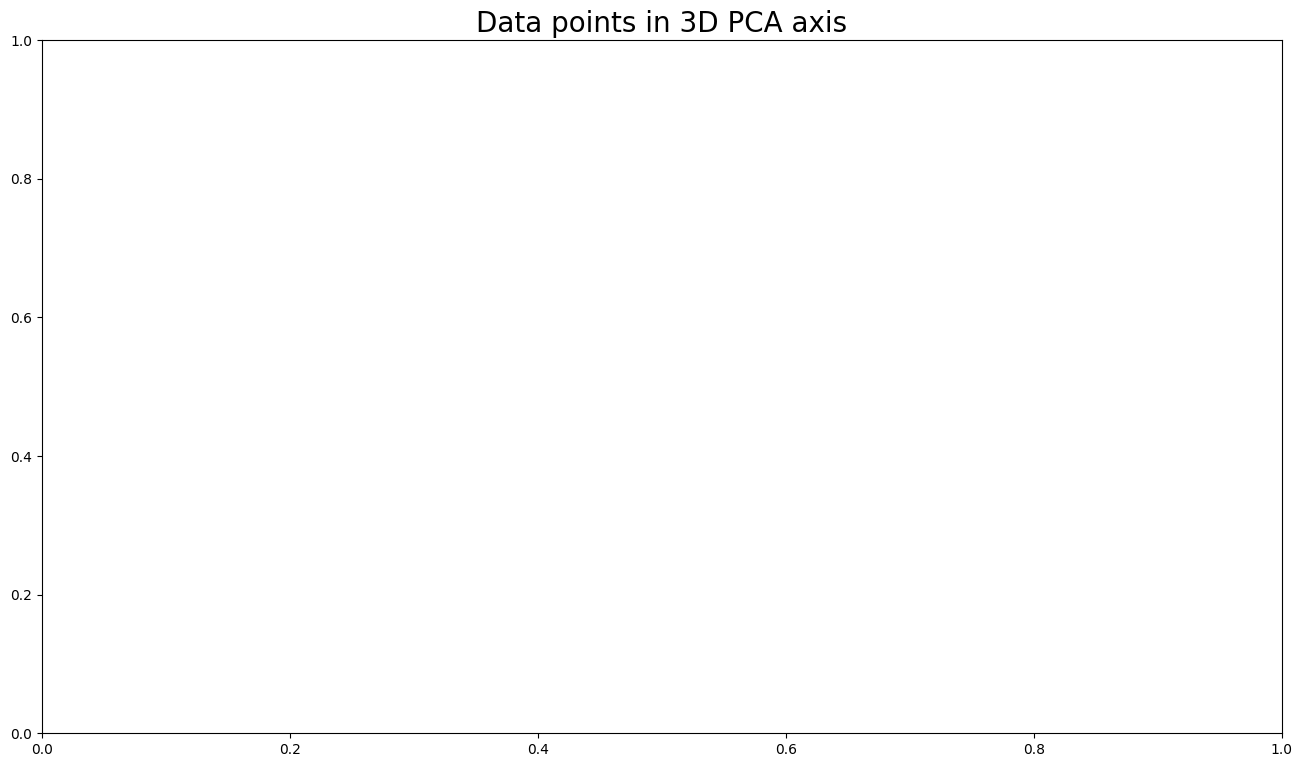

In [68]:
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams['figure.figsize'] = (16, 9)


fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(tocluster[0], tocluster[2], tocluster[1])

plt.title('Data points in 3D PCA axis', fontsize=20)
plt.show()